# Classify Iris species by KNN

# Background

The Iris flower dataset is a multivariate data set, firstly introduced by Ronald Fisher(British statistician and biologist) in 1936. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning.

In [18]:
# read the iris data into a DataFrame
import pandas as pd
import seaborn as sns
col_names= ["sepal_length", "sepal_width", "petal_length", "petal_width", "spec"]
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=col_names)

In [2]:
import numpy as np

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,spec
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [21]:
#check basic statistics of dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pairplot is useful to demostrate the relationship of different features.
The plots in diagonal line refer to the distribution of 3 kinds of iris in designated feature.
For the remaining plots, they shows the relationship of 2 features.

3 species overlap a lot in both sepal_length and sepal_width. Virginica(green) and versicolor(orange) overlie each other when compare sepal length and sepal width.

Generally, the clue is to differentiate Virginica and versicolor. 

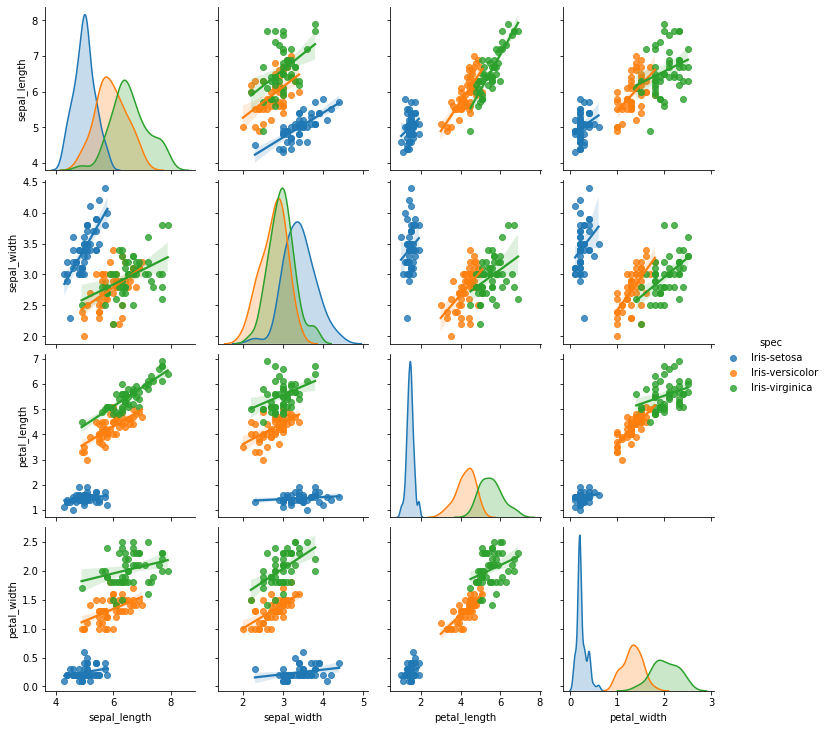

In [24]:
sns.pairplot(iris,kind="reg",hue="spec")

Let's try to plot a 3D graph. It's already found that variations between 3 species are the largest in both petal length and petal width, so these two features must be carried in consideration. The species seem to be overlapping a lot in sepal length, when compared with sepal width, so take sepal length as the z-axis

In [53]:
setosa = iris.loc[iris['spec']=='Iris-setosa']
versicolor = iris.loc[iris['spec']=='Iris-versicolor']
virginica = iris.loc[iris['spec']=='Iris-virginica']

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[]

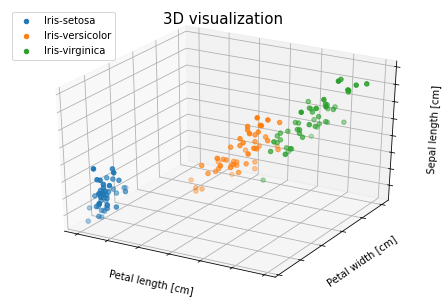

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(setosa.petal_length, setosa.petal_width, setosa.sepal_length, label='Iris-setosa')
ax.scatter(versicolor.petal_length, versicolor.petal_width, versicolor.sepal_length, label='Iris-versicolor')
ax.scatter(virginica.petal_length, virginica.petal_width, virginica.sepal_length, label='Iris-virginica')

ax.legend(loc='upper left')

ax.set_title("3D visualization", fontsize=15)
ax.set_xlabel("Petal length [cm]", fontsize=10)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Petal width [cm]", fontsize=10)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Sepal length [cm]", fontsize=10)
ax.w_zaxis.set_ticklabels([])

# Model by KNN

In [4]:
spec = iris['spec']

In [5]:
spec.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
spec = spec.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [58]:
spec

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: spec, Length: 150, dtype: int64

In [59]:
iris = iris.drop(columns=['spec'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(iris, spec, test_size=0.2, random_state=46)

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
print(knn.predict(X_valid))

[0 1 1 0 0 2 0 1 1 1 1 2 0 2 0 0 0 0 1 2 0 2 0 1 2 0 1 2 2 2]


In [16]:
print(y_valid)

4      0
54     1
106    2
8      0
24     0
131    2
42     0
94     1
95     1
74     1
78     1
135    2
43     0
103    2
11     0
37     0
49     0
10     0
77     1
117    2
39     0
102    2
48     0
67     1
101    2
27     0
75     1
133    2
144    2
70     1
Name: spec, dtype: int64


In [61]:
knn.score(X_valid, y_valid)

0.9333333333333333

The default value of k is 5 and it already has 93% accuracy in the validation set.
When k=12, it performs better in this validation set.

Thus, both k=5 and k=12 should be carried out in prediction for comparation.

In [83]:
#Compare the accuracy in different k values
for i in range(5,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("n_neighbors={} : {}".format(i,knn.score(X_valid, y_valid)))

n_neighbors=5 : 0.9333333333333333
n_neighbors=6 : 0.9
n_neighbors=7 : 0.9
n_neighbors=8 : 0.9333333333333333
n_neighbors=9 : 0.9
n_neighbors=10 : 0.9333333333333333
n_neighbors=11 : 0.9
n_neighbors=12 : 0.9666666666666667
n_neighbors=13 : 0.9
n_neighbors=14 : 0.9333333333333333
n_neighbors=15 : 0.9333333333333333
n_neighbors=16 : 0.9333333333333333
n_neighbors=17 : 0.9333333333333333
n_neighbors=18 : 0.9333333333333333
n_neighbors=19 : 0.9333333333333333
